In [4]:
%matplotlib inline

from __future__ import print_function
from statsmodels.compat import lzip
import statsmodels
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices

In [5]:
>>> import patsy
>>> patsy.__version__

'0.5.1'

In [13]:
 df = sm.datasets.get_rdataset("Guerry", "HistData").data

In [14]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 23 columns):
dept               86 non-null int64
Region             85 non-null object
Department         86 non-null object
Crime_pers         86 non-null int64
Crime_prop         86 non-null int64
Literacy           86 non-null int64
Donations          86 non-null int64
Infants            86 non-null int64
Suicides           86 non-null int64
MainCity           86 non-null object
Wealth             86 non-null int64
Commerce           86 non-null int64
Clergy             86 non-null int64
Crime_parents      86 non-null int64
Infanticide        86 non-null int64
Donation_clergy    86 non-null int64
Lottery            86 non-null int64
Desertion          86 non-null int64
Instruction        86 non-null int64
Prostitutes        86 non-null int64
Distance           86 non-null float64
Area               86 non-null int64
Pop1831            86 non-null float64
dtypes: float64(2), int64(18), object(3

In [15]:
#Load the file
#dat = pd.read_csv('https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/HistData/Guerry.csv')

dat = pd.read_csv('dataFile.csv')
dat.info()

dat.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 25 columns):
Unnamed: 0         86 non-null int64
Unnamed: 0.1       86 non-null int64
dept               86 non-null int64
Region             85 non-null object
Department         86 non-null object
Crime_pers         86 non-null int64
Crime_prop         86 non-null int64
Literacy           86 non-null int64
Donations          86 non-null int64
Infants            86 non-null int64
Suicides           86 non-null int64
MainCity           86 non-null object
Wealth             86 non-null int64
Commerce           86 non-null int64
Clergy             86 non-null int64
Crime_parents      86 non-null int64
Infanticide        86 non-null int64
Donation_clergy    86 non-null int64
Lottery            86 non-null int64
Desertion          86 non-null int64
Instruction        86 non-null int64
Prostitutes        86 non-null int64
Distance           86 non-null float64
Area               86 non-null int64
Pop1

,Unnamed: 0,Unnamed: 0.1,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,...,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
0,0,1,1,E,Ain,28870,15890,37,5098,33120,...,71,60,69,41,55,46,13,218.372,5762,346.03
1,1,2,2,N,Aisne,26226,5521,51,8901,14572,...,4,82,36,38,82,24,327,65.945,7369,513.00
2,2,3,3,C,Allier,26747,7925,13,10973,17044,...,46,42,76,66,16,85,34,161.927,7340,298.26
3,3,4,4,E,Basses-Alpes,12935,7289,46,2733,23018,...,70,12,37,80,32,29,2,351.399,6925,155.90
4,4,5,5,E,Hautes-Alpes,17488,8174,69,6962,23076,...,22,23,64,79,35,7,1,320.280,5549,129.10
5,5,6,7,S,Ardeche,9474,10263,27,3188,42117,...,76,47,67,70,19,62,1,279.413,5529,340.73
6,6,7,8,N,Ardennes,35203,8847,67,6400,16106,...,53,85,49,31,62,9,83,105.694,5229,289.62
7,7,8,9,S,Ariege,6173,9597,18,3542,22916,...,74,28,63,75,22,77,3,385.313,4890,253.12
8,8,9,10,E,Aube,19602,4086,59,3608,18642,...,77,54,9,28,86,15,207,83.244,6004,246.36
9,9,10,11,S,Aude,15647,10431,34,2582,20225,...,80,35,27,50,63,48,1,370.949,6139,270.13


In [16]:
y, X = dmatrices('Lottery ~ Literacy + Region', data=dat, return_type='dataframe')

In [17]:
# Fit regression model (using the natural log of one of the regressors)
results = smf.ols(formula='Lottery ~ Literacy + (Pop1831)', data=df).fit()

# Inspect the results
#
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     19.95
Date:                Sun, 05 May 2019   Prob (F-statistic):           8.40e-08
Time:                        13:04:57   Log-Likelihood:                -381.36
No. Observations:                  86   AIC:                             768.7
Df Residuals:                      83   BIC:                             776.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     89.8137      7.683     11.690      0.0

In [8]:
# Normality of the residuals
# Fi
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(results.resid)
lzip(name, test)

[('Jarque-Bera', 2.810082702032472),
 ('Chi^2 two-tail prob.', 0.24535691048556563),
 ('Skew', -0.3495299008991147),
 ('Kurtosis', 2.4563783304002524)]

In [9]:
# Fit regression model without natural log of one of the regressors)
results_noLog = smf.ols('Lottery ~ Literacy + Pop1831', data=dat).fit()
test_no_log = sms.jarque_bera(results_noLog.resid)
lzip(name, test_no_log)

[('Jarque-Bera', 2.810082702032472),
 ('Chi^2 two-tail prob.', 0.24535691048556563),
 ('Skew', -0.3495299008991147),
 ('Kurtosis', 2.4563783304002524)]

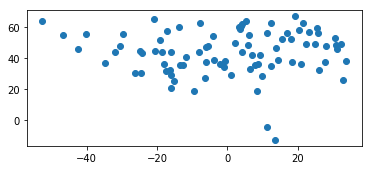

In [10]:
pred_val = results.fittedvalues.copy()
true_val = dat['Lottery'].values.copy()

residual = true_val - pred_val

fig,ax = plt.subplots(figsize=(6,2.5))
ax.scatter(residual, pred_val)

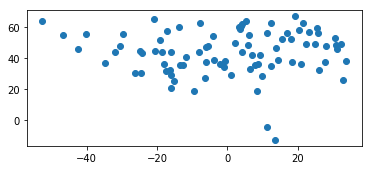

In [11]:
pred_val_nl = results_noLog.fittedvalues.copy()
true_val_nl = dat['Lottery'].values.copy()

residual_nl = true_val_nl - pred_val_nl

fig, ax = plt.subplots(figsize=(6,2.5))
ax.scatter(residual_nl, pred_val_nl)

Following is another way to get residal from result only

# Linerarity ( Residual vs Predicted )

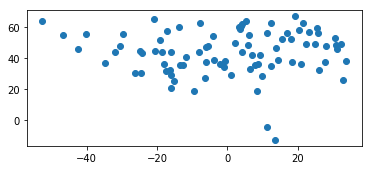

In [12]:

fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(results_noLog.resid,pred_val_nl)

In [39]:
print(results.resid)

0     -5.961129
1      9.911997
2      4.276312
3     23.227563
4     31.020861
5     17.965145
6     -6.074221
7     12.287734
8    -16.011684
9     -3.965053
10    32.190438
11   -42.501394
12   -15.969709
13    25.778824
14    13.787791
15    -3.705178
16   -20.836758
17    21.555008
18    -0.988794
19    33.856962
20    25.533521
21    31.227406
22   -18.040940
23     5.952179
24    12.364961
25     4.041498
26    -8.104922
27   -24.719022
28   -18.734226
29    25.008575
        ...    
56    11.285936
57     7.813420
58    20.855867
59     8.466935
60    14.361486
61    -2.201995
62    28.195322
63   -52.711723
64   -15.929715
65   -15.268807
66   -34.693715
67    27.815676
68     8.824028
69     6.974435
70    13.416302
71    -9.505542
72   -11.633714
73   -24.528363
74    22.357759
75     0.898795
76    11.178951
77     3.782963
78   -29.621617
79   -46.848556
80    15.668431
81   -17.250030
82    -7.692281
83   -17.421202
84     9.198168
85    30.547017
Length: 86, dtype: float

# A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, so you reject the null hypothesis.
# A large p-value (> 0.05) indicates weak evidence against the null hypothesis, so you fail to reject the null hypothesis.
# p-values very close to the cutoff (0.05) are considered to be marginal (could go either way). Always report the p-value so your readers can draw their own conclusions.

In [13]:
#Checking normality of residuals 
#We use Shapiro Wilk test  from scipy library to check the normality of residuals.
     #Null Hypothesis: The residuals are normally distributed.
     #Alternative Hypothesis: The residuals are not normally distributed.


from scipy import stats
print('For log..')
stats.shapiro(results.resid)



For log..


(0.9748456478118896, 0.09135570377111435)

In [14]:
print('For No log..')
stats.shapiro(results_noLog.resid)

For No log..


(0.9748456478118896, 0.09135570377111435)

In [15]:
# harvey_collier
sms.linear_harvey_collier(results)

Ttest_1sampResult(statistic=-1.0821253920497425, pvalue=0.2823688203355932)

In [16]:
sms.linear_harvey_collier(results_noLog)

Ttest_1sampResult(statistic=-1.0821253920497425, pvalue=0.2823688203355932)

# Autocorrelation

In [17]:
#Checking for autocorrelation To ensure the absence of autocorrelation we use Ljungbox test.
    #Null Hypothesis: Autocorrelation is absent.
    #Alternative Hypothesis: Autocorrelation is present.
    
from statsmodels.stats import diagnostic as diag
val = diag.acorr_ljungbox(results.resid , lags = 1,boxpierce=True)     
name = ['Test Stats','p-value','Box-Pierce-Test Stats','Box-Pierce P-Value']
lzip(name,val)

[('Test Stats', array([0.00151352])),
 ('p-value', array([0.96896694])),
 ('Box-Pierce-Test Stats', array([0.00146192])),
 ('Box-Pierce P-Value', array([0.96950023]))]

 Look for Durbin – Watson (DW) statistic. 
 It must lie between 0 and 4. 
 If DW = 2, implies no autocorrelation, 
 If 0 < DW < 2 implies positive autocorrelation 
 If 2 < DW < 4 indicates negative autocorrelation. 

In [18]:
test = sms.durbin_watson(results.resid,axis=0)
print('The Durbin-Watson statistic:' ,test)

The Durbin-Watson statistic: 1.981180666151201


# ACF PLOT

In [19]:
data_loc = 'AirPassengers.csv'
data = pd.read_csv(data_loc)

print(data.head())

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month          144 non-null object
#Passengers    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


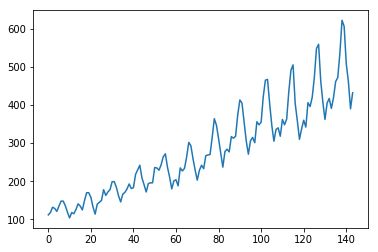

In [21]:
ts_data = data['#Passengers']
plt.plot(ts_data)
plt.show()

In [22]:
# autocorrelation
print(sm.graphics.tsa.acf(ts_data, nlags=40))
# partial autocorrelation
print(sm.graphics.tsa.acf(ts_data, nlags=40))

[1.         0.94804734 0.87557484 0.80668116 0.75262542 0.71376997
 0.6817336  0.66290439 0.65561048 0.67094833 0.70271992 0.74324019
 0.76039504 0.71266087 0.64634228 0.58592342 0.53795519 0.49974753
 0.46873401 0.44987066 0.4416288  0.45722376 0.48248203 0.51712699
 0.53218983 0.49397569 0.43772134 0.3876029  0.34802503 0.31498388
 0.28849682 0.27080187 0.26429011 0.27679934 0.2985215  0.32558712
 0.3370236  0.30333486 0.25397708 0.21065534 0.17217092]
[1.         0.94804734 0.87557484 0.80668116 0.75262542 0.71376997
 0.6817336  0.66290439 0.65561048 0.67094833 0.70271992 0.74324019
 0.76039504 0.71266087 0.64634228 0.58592342 0.53795519 0.49974753
 0.46873401 0.44987066 0.4416288  0.45722376 0.48248203 0.51712699
 0.53218983 0.49397569 0.43772134 0.3876029  0.34802503 0.31498388
 0.28849682 0.27080187 0.26429011 0.27679934 0.2985215  0.32558712
 0.3370236  0.30333486 0.25397708 0.21065534 0.17217092]


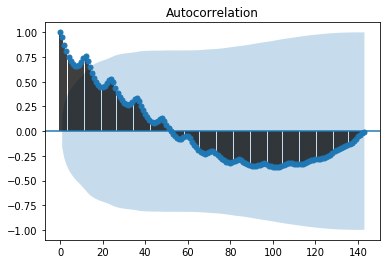

In [23]:
sm.graphics.tsa.plot_acf(ts_data, lags=143)
plt.show()

/Users/rajnishechauhan/anaconda/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


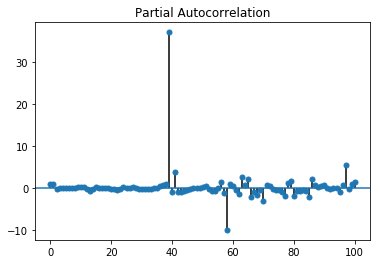

In [24]:
sm.graphics.tsa.plot_pacf(ts_data, lags=100)
plt.show()

# Heteroskedasticity tests
Checking heteroscedasticity Using Goldfeld Quandt we test for heteroscedasticity.

Null Hypothesis: Error terms are homoscedastic

Alternative Hypothesis: Error terms are heteroscedastic.

In [25]:

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(results.resid, results.model.exog)
lzip(name, test)

[('F statistic', 1.032155869014919), ('p-value', 0.46038670805343374)]

Breush-Pagan test:

In [26]:
name = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']
test = sms.het_breushpagan(results.resid, results.model.exog)
lzip(name, test)

/Users/rajnishechauhan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `het_breushpagan` is deprecated, use `het_breuschpagan` instead!
Use het_breuschpagan, het_breushpagan will be removed in 0.9 
(Note: misspelling missing 'c')
  This is separate from the ipykernel package so we can avoid doing imports until


[('Lagrange multiplier statistic', 3.611402856711017),
 ('p-value', 0.16435912998095564),
 ('f-value', 1.819101474599087),
 ('f p-value', 0.1685773635759021)]

# MULTICOLLINEARITY
VIF value <= 4 suggests no multicollinearity 
whereas a value of >= 10 implies serious multicollinearity. 
Above all, a correlation table should also solve the purpose.

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train1 = dat[['Literacy','Pop1831']]
vif = [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])]
vif_s=pd.Series(vif, index =X_train1.columns)
print(vif_s) 

Literacy    3.990393
Pop1831     3.990393
dtype: float64


In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train2 = dat.drop(["Department","Region","MainCity"],axis=1)
vif = [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])]
vif_s=pd.Series(vif, index = X_train2.columns)
print(vif_s) 

Unnamed: 0         1.630455e+06
Unnamed: 0.1       1.682505e+06
dept               1.774050e+01
Crime_pers         3.246488e+00
Crime_prop         2.882908e+00
Literacy           3.106302e+01
Donations          2.053085e+00
Infants            1.692584e+00
Suicides           2.278849e+00
Wealth             2.106328e+00
Commerce           2.968576e+00
Clergy             2.495463e+00
Crime_parents      1.872078e+00
Infanticide        1.814390e+00
Donation_clergy    2.600097e+00
Lottery            2.876223e+00
Desertion          2.323016e+00
Instruction        3.147494e+01
Prostitutes        2.505826e+00
Distance           3.040758e+00
Area               1.911550e+00
Pop1831            2.977025e+00
dtype: float64


VIF value <= 4 suggests no multicollinearity whereas a value of >= 10 implies serious multicollinearity. Above all, a correlation table should also solve the purpose.

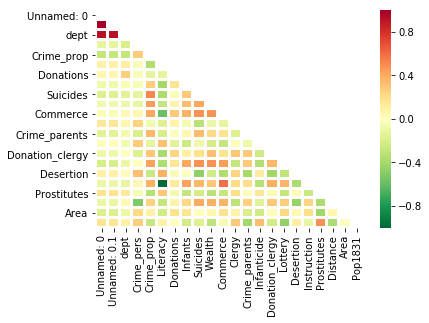

In [29]:
import seaborn

v_corr = X_train2.corr(method='pearson')

mask=np.zeros_like(v_corr)
mask[np.triu_indices_from(mask)] = True

seaborn.heatmap(v_corr,cmap='RdYlGn_r',vmax=1.0,vmin=-1.0,mask=mask,linewidths=2)

plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

In [30]:
from statsmodels.stats.outliers_influence import OLSInfluence
test_class = OLSInfluence(results)
test_class.dfbetas[:5,:]

array([[-0.01628959,  0.0034757 ,  0.00653306],
       [-0.03925428,  0.03164204,  0.04475492],
       [ 0.03640202, -0.03401921, -0.00942704],
       [ 0.13857861,  0.06638613, -0.19494806],
       [ 0.07539294,  0.33433165, -0.32847944]])

In [31]:
f = test_class.summary_frame()
print(f)

    dfb_Intercept  dfb_Literacy  dfb_Pop1831   cooks_d  standard_resid  \
0       -0.016290      0.003476     0.006533  0.000347       -0.288859   
1       -0.039254      0.031642     0.044755  0.002034        0.483523   
2        0.036402     -0.034019    -0.009427  0.000622        0.210234   
3        0.138579      0.066386    -0.194948  0.018702        1.142366   
4        0.075393      0.334332    -0.328479  0.076414        1.562444   
5        0.084960     -0.065442    -0.018388  0.004637        0.873011   
6        0.008500     -0.054949     0.024642  0.001516       -0.299827   
7        0.106732     -0.076488    -0.048905  0.004476        0.602584   
8       -0.019259     -0.105957     0.086269  0.008246       -0.786350   
9       -0.020492      0.005009     0.014794  0.000234       -0.192742   
10       0.114737     -0.080136    -0.015420  0.011859        1.561470   
11      -0.096831      0.014009     0.028157  0.016971       -2.059001   
12       0.058984     -0.056888    -0.

In [32]:
t = test_class.summary_table()
print(f)

    dfb_Intercept  dfb_Literacy  dfb_Pop1831   cooks_d  standard_resid  \
0       -0.016290      0.003476     0.006533  0.000347       -0.288859   
1       -0.039254      0.031642     0.044755  0.002034        0.483523   
2        0.036402     -0.034019    -0.009427  0.000622        0.210234   
3        0.138579      0.066386    -0.194948  0.018702        1.142366   
4        0.075393      0.334332    -0.328479  0.076414        1.562444   
5        0.084960     -0.065442    -0.018388  0.004637        0.873011   
6        0.008500     -0.054949     0.024642  0.001516       -0.299827   
7        0.106732     -0.076488    -0.048905  0.004476        0.602584   
8       -0.019259     -0.105957     0.086269  0.008246       -0.786350   
9       -0.020492      0.005009     0.014794  0.000234       -0.192742   
10       0.114737     -0.080136    -0.015420  0.011859        1.561470   
11      -0.096831      0.014009     0.028157  0.016971       -2.059001   
12       0.058984     -0.056888    -0.

Leverage is the potential for a case to have an influence on the model. You can identify points with high leverage as those furthest to the right. A point with high leverage may not have much influence on the model if it fits the overall model without that case.

Influence combines the leverage and residual of a case to measure how the parameter estimates would change if that case were excluded. 

Points with a large residual and high leverage have the most influence. 

They can have an adverse effect on (perturb) the model if they are changed or excluded, making the model less robust. Sometimes a small group of influential points can have an unduly large impact on the fit of the model.



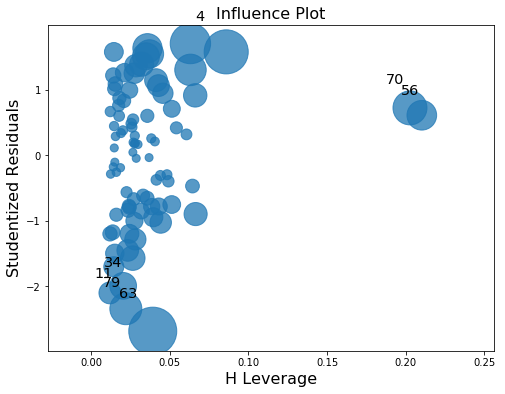

In [33]:
fig, ax = plt.subplots(figsize=(8,6))
fig = sm.graphics.influence_plot(results, ax=ax,criterion="cooks",alpha=0.05)

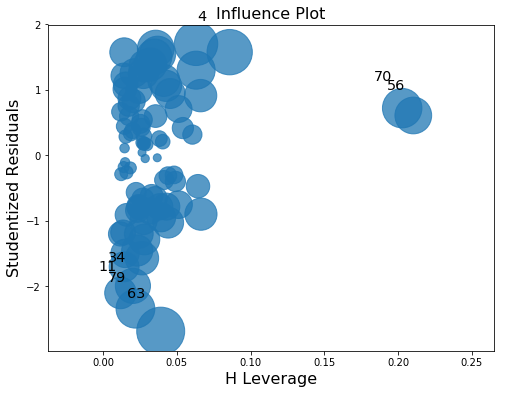

In [34]:
fig2, ax2 = plt.subplots(figsize=(8,6))
fig2 = sm.graphics.influence_plot(results, ax=ax2,criterion="DFFITS",alpha=0.05)

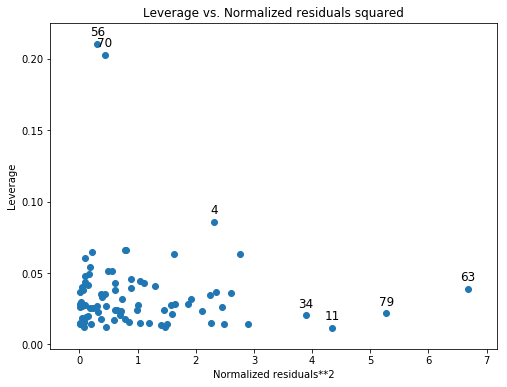

In [35]:
fig, ax = plt.subplots(figsize=(8,6))
fig = sm.graphics.plot_leverage_resid2(results, ax=ax)

In [36]:
prestige = sm.datasets.get_rdataset("Duncan", "carData", cache=True).data

prestige_model = smf.ols("prestige ~ income + education", data=prestige).fit()

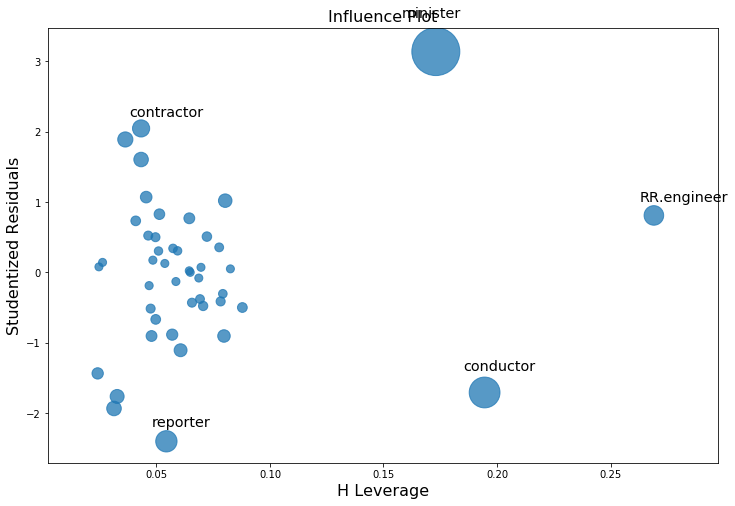

In [37]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(prestige_model, ax=ax, criterion="cooks")
